In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('reformat_final_results.csv')

# Display the DataFrame
display(df)

,Retriever Type,Reranker,Parameters,Hit Rate,Precision,Recall,F1 Score,MRR
0,Chained Retriever,None (Baseline),bm25_n: 25\n\nfaiss_n: 10\n\nfinal_k: 5,0.783,0.36,0.850,0.480,0.592
1,Ensemble Retriever,None (Baseline),"weight: [0.4, 0.6]\n\ntop_k: 10\n\nfinal_k: 5",0.652,0.30,0.667,0.393,0.750
2,Chained Retriever,FlashRank,bm25_n: 25\n\nfaiss_n: 10\n\nfinal_k: 5,0.435,0.20,0.533,0.279,0.533
3,Ensemble Retriever,FlashRank,"weight: [0.4, 0.6]\n\ntop_k: 10\n\nfinal_k: 5",0.304,0.14,0.425,0.203,0.365
4,Chained Retriever,bge-reranker-base,bm25_n: 25\n\nfaiss_n: 10\n\nfinal_k: 5,0.696,0.32,0.783,0.432,0.808
5,Ensemble Retriever,bge-reranker-base,"weight: [0.4, 0.6]\n\ntop_k: 10\n\nfinal_k: 5",0.565,0.26,0.650,0.350,0.703
6,Chained Retriever,colbert,bm25_n: 25\n\nfaiss_n: 10\n\nfinal_k: 5,0.696,0.32,0.783,0.432,0.700
7,Ensemble Retriever,colbert,"weight: [0.4, 0.6]\n\ntop_k: 10\n\nfinal_k: 5",0.565,0.26,0.600,0.345,0.650


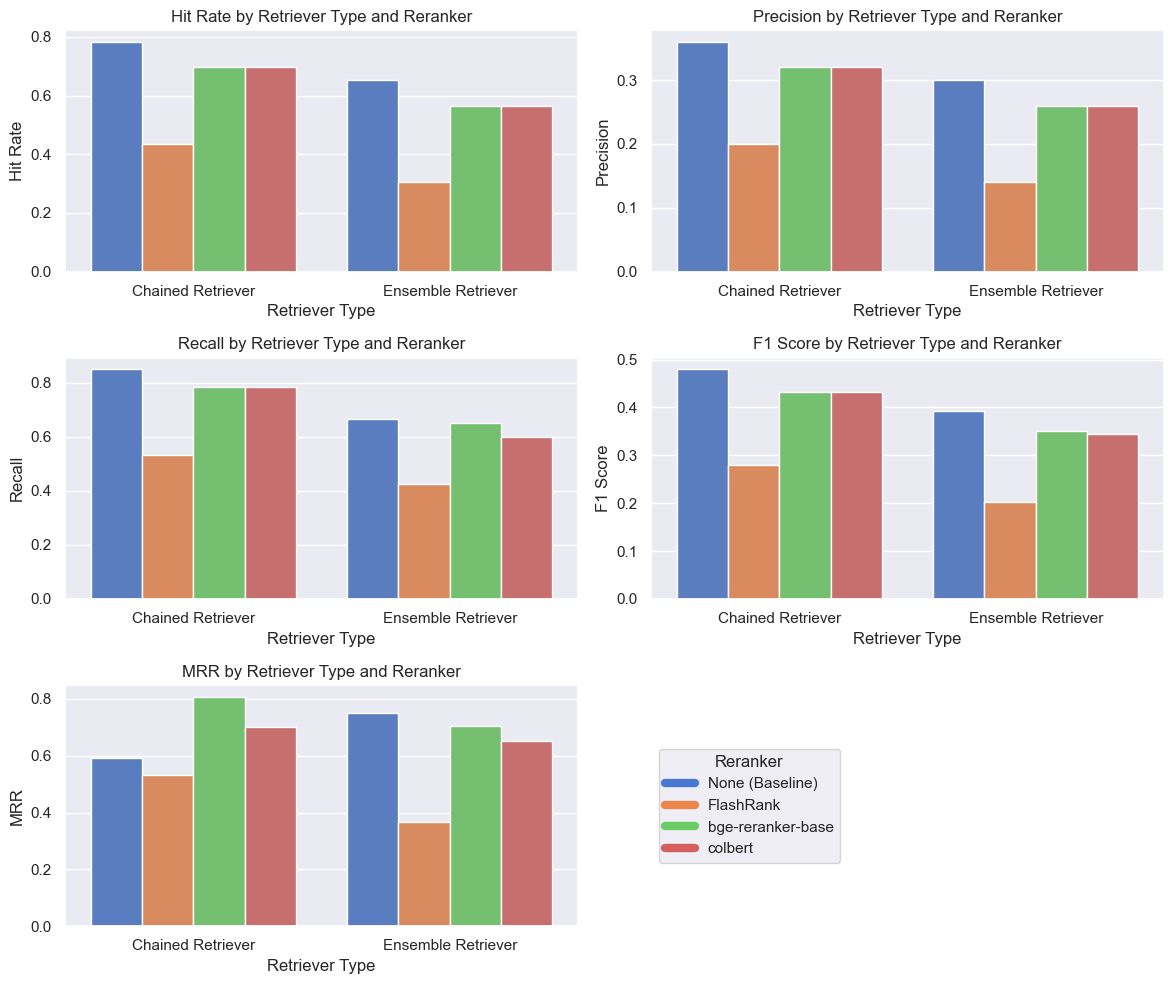

In [7]:
import matplotlib.lines as mlines
sns.set_theme()

# Set the figure size for the plots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

# List of metrics to plot
metrics = ['Hit Rate', 'Precision', 'Recall', 'F1 Score', 'MRR']

# Define the reranker categories
reranker_labels = ['None (Baseline)', 'FlashRank', 'bge-reranker-base', 'colbert']


# Color palette for the rerankers
colors = sns.color_palette("muted", len(reranker_labels))

# Loop through metrics to plot each one
for i, metric in enumerate(metrics):
    sns.barplot(x='Retriever Type', y=metric, hue='Reranker', data=df, ax=axes[i], palette=colors, legend=False)
    axes[i].set_title(f'{metric} by Retriever Type and Reranker')
    axes[i].set_xlabel('Retriever Type')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x')

axes[-1].axis('off')  # Disable the empty subplot area

# Create custom legend handles manually
# Create legend handles (Line2D objects for each Reranker)
handles = [mlines.Line2D([0], [0], color=color, lw=6) for color in colors]

# Now place the legend in the last empty subplot
axes[-1].legend(handles, reranker_labels, title='Reranker', loc='center left')


# Increase space between the plots and legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Use a smaller width for the plots to create space for the legend
plt.savefig("Reranker-performance.png")
# # Show the plot
# plt.show()